In [102]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl
from matplotlib import cm

## Detección de Carbón mediante algoritmo
Desarrolle un procedimiento para estimar el contenido de carbono del acero presentado en la figura, en función de los contenidos de ferrita y perlita.

![tarea](images/tarea.PNG)

## Funciones de Preprocesamineto de Imagen

In [154]:
def load_image(path):
    """ leer imagen y converirtla en np.numpayarray """
    img =  cv2.imread(path)                     # Lee imagen
    img =  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # Convierte de BGR (standard en CV2) a RGB 
    return img

def visualize_image(img):
    """visualizar imagen cruda"""
    fig,ax  = plt.subplots(1,1,figsize=(10,5))
    title = f" Shape: {img.shape}"
    ax.imshow(img)
    ax.set_title(title)
    plt.show()
    
def gray(img):
    """ Convertir a blanco y negro"""
    img_gray =  (0.332*(img[:,:,0] +  img[:,:,1] + img[:,:,2])).astype(np.uint8)

    return img_gray

def binarize(img,thresh):
    ''' Binarizar imagen'''
    im_bw = cv2.threshold(img, thresh, 1, cv2.THRESH_BINARY)[1]
    return im_bw

def visualize_image_colorbar(img,colormap=False):
    """ Visualizar imagen procesada"""
    fig,ax  = plt.subplots(1,1,figsize=(10,10))
    title = f" Shape: {img.shape}"
    ax.set_title(title)
   
    if colormap:
    
        tickles =[0,1]
        image =  plt.imshow(img,cm.gray)
        plt.colorbar(image,ax=ax,shrink=0.3,ticks=tickles)

    
    else:
        image = plt.imshow(img)
        plt.colorbar(image,ax=ax,shrink=0.3)
        
    plt.show()

Imagen cargada


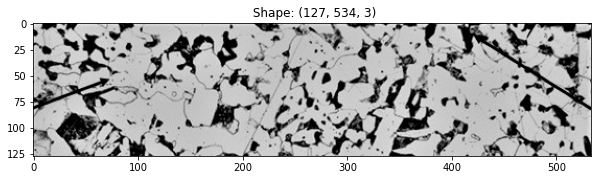

Imagen en blanco y negro


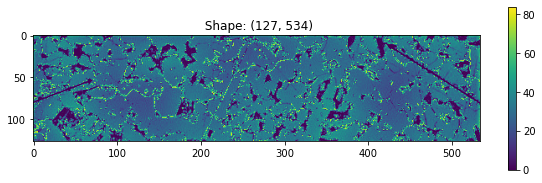

Imagen Binarizada


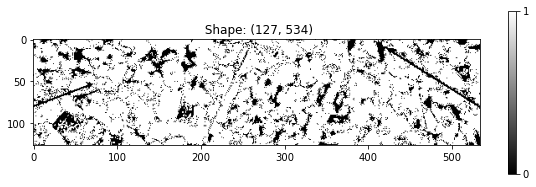

In [156]:
path = "images/metal.png"                           # Directorio de imagen
img = load_image(path)                              # Cargar imagen
print("Imagen cargada")
visualize_image(img)                                # visualizar imagen
img_gray = gray(img)                                # Convertir imagen a grises
print("Imagen en blanco y negro")
visualize_image_colorbar(img_gray,colormap=False)   # Visaulizar imagen en blanco y negro
img_bw = binarize(img_gray ,thresh = 15)            # Convertir a binario
print("Imagen Binarizada")
visualize_image_colorbar(img_bw,colormap=True)      # visualizar imagen Binaria

### Algortimo de deteccion de carbón

In [157]:
height,width= img_bw.shape      # Obtener la altura y la abse de la imagen
Area    = height*width          # Calcular el Area
Ferrita = 0                     # Craer varialble para ferrita
Perlita = 0                     # Crear variable  para perlita

for hi in range(0,height):      # Iterar sobre la altura
    for wi in range(0,width):   # Iterar sobre la base
        
        if img_bw[hi,wi] == 1:  # si el pixel es 1
            Ferrita +=1         # Agregar porcion a ferrita
          
        else:                   # Si es 0
            Perlita +=1         # Agreguar porcion a perlita
    
            
### Calucular porcentajes ###
Porcentaje_Perlita = (Perlita*100)/Area  # Porcentaje de Perlita
Porcentaje_Ferrita = (Ferrita*100)/Area  # Porcentaje de Ferrita

### Avizar al Usario de los porcentajes ###
print(f"Porcentaje de Perlita: {Porcentaje_Perlita} %")
print(f"Porcentaje de Ferrita: {Porcentaje_Ferrita} %")


Porcentaje de Perlita: 17.549913002447727 %
Porcentaje de Ferrita: 82.45008699755228 %


Considerando que la Perlita encontrada tiene un contenido de carbono del 0.8 % llegamos a la conclusion de que se obteiene el sigueinte porcentaje de carbono total en el area estudiada:

In [158]:
contenido_carbono  = 0.8                                           # Contenido de carbon
Porcentaje_carbono = contenido_carbono*Porcentaje_Perlita/100      # Porcentaje
print(f"Porcenteaje de carbono total: {Porcentaje_carbono} %")     

Porcenteaje de carbono total: 0.1403993040195818 %
